In [ ]:
# Step 1: Mount Google Drive and load the dataset
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Replace with your actual path
df = pd.read_csv('/content/drive/MyDrive/final_dataset')
df.shape[0]

print(df.dtypes)
df.shape

<ipython-input-7-3f6cd740a61b>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/final_dataset')


GeneSymbol                         object
Origin                             object
Chromosome                         object
Start                               int64
NumberSubmitters                    int64
Grouped_ClinicalSignificance       object
is_frameshift                       int64
is_splice_site                      int64
is_missense                         int64
is_nonsense                         int64
is_synonymous                       int64
is_repeat_variant                   int64
type_Complex                         bool
type_Deletion                        bool
type_Duplication                     bool
type_Indel                           bool
type_Insertion                       bool
type_Inversion                       bool
type_Microsatellite                  bool
type_Tandem duplication              bool
type_Translocation                   bool
type_Variation                       bool
type_copy number gain                bool
type_copy number loss             

(6053974, 27)

In [ ]:
pip install tensorflow

In [ ]:
# Step 2: Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop(columns=['Grouped_ClinicalSignificance'])
y = df['Grouped_ClinicalSignificance']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode target labels for ANN softmax
from tensorflow.keras.utils import to_categorical
y_onehot = to_categorical(y_encoded)

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# Build preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])


In [ ]:
df.shape

(6053974, 27)

In [ ]:
df = df[df["Grouped_ClinicalSignificance"] != "risk allele"]

In [ ]:
df.duplicated().any()

np.False_

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.dtypes

,0
GeneSymbol,object
Origin,object
Chromosome,object
Start,int64
NumberSubmitters,int64
Grouped_ClinicalSignificance,object
is_frameshift,int64
is_splice_site,int64
is_missense,int64
is_nonsense,int64


In [ ]:
# Identify feature types
categorical_cols = ['GeneSymbol', 'Origin', 'Chromosome']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Fix: Convert all categorical columns to string
for col in categorical_cols:
    X[col] = X[col].astype(str)

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])


In [ ]:
df.shape

(6053974, 27)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Apply transformations
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


In [ ]:
from tensorflow.keras import models, layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input


In [ ]:
import numpy as np

# Sample 10% of the dataset
sample_size = int(0.2 * X_train_scaled.shape[0])
X_train_sampled = X_train_scaled[:sample_size]
y_train_sampled = y_train[:sample_size]

# Neural Network Model
model = models.Sequential([
    layers.Input(shape=(X_train_sampled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(y_train_sampled.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the sampled data
history = model.fit(X_train_sampled, y_train_sampled, validation_split=0.2, epochs=10)


Epoch 1/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 145s 6ms/step - accuracy: 0.8207 - loss: 0.5749 - val_accuracy: 0.8392 - val_loss: 0.4890
Epoch 2/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 109s 5ms/step - accuracy: 0.8429 - loss: 0.4859 - val_accuracy: 0.8436 - val_loss: 0.4781
Epoch 3/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 143s 5ms/step - accuracy: 0.8465 - loss: 0.4728 - val_accuracy: 0.8457 - val_loss: 0.4713
Epoch 4/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 113s 5ms/step - accuracy: 0.8495 - loss: 0.4650 - val_accuracy: 0.8460 - val_loss: 0.4699
Epoch 5/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 105s 4ms/step - accuracy: 0.8514 - loss: 0.4604 - val_accuracy: 0.8463 - val_loss: 0.4689
Epoch 6/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 144s 4ms/step - accuracy: 0.8521 - loss: 0.4581 - val_accuracy: 0.8465 - val_loss: 0.4678
Epoch 7/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 104s 4ms/step - accuracy: 0.8528 - loss: 0.4562 - val_accuracy: 0.8471 - val_loss: 0.4690
Epoch 8/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 109s 4ms/step - ac

In [ ]:
import time

# Track training time
start_time = time.time()
history = model.fit(X_train_sampled, y_train_sampled, validation_split=0.2, epochs=10)
end_time = time.time()

computation_time = end_time - start_time


Epoch 1/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 110s 5ms/step - accuracy: 0.8552 - loss: 0.4575 - val_accuracy: 0.8472 - val_loss: 0.4718
Epoch 2/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - accuracy: 0.8559 - loss: 0.4485 - val_accuracy: 0.8475 - val_loss: 0.4661
Epoch 3/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 136s 4ms/step - accuracy: 0.8565 - loss: 0.4472 - val_accuracy: 0.8483 - val_loss: 0.4753
Epoch 4/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 141s 4ms/step - accuracy: 0.8566 - loss: 0.4515 - val_accuracy: 0.8474 - val_loss: 0.4726
Epoch 5/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 108s 4ms/step - accuracy: 0.8572 - loss: 0.4452 - val_accuracy: 0.8457 - val_loss: 0.4726
Epoch 6/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 136s 4ms/step - accuracy: 0.8579 - loss: 0.4475 - val_accuracy: 0.8473 - val_loss: 0.4715
Epoch 7/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 108s 4ms/step - accuracy: 0.8586 - loss: 0.4438 - val_accuracy: 0.8466 - val_loss: 0.4707
Epoch 8/10
24216/24216 ━━━━━━━━━━━━━━━━━━━━ 103s 4ms/step - ac

In [ ]:
# Track inference time
start_infer = time.time()
y_pred_probs = model.predict(X_test_scaled)
end_infer = time.time()

inference_time = end_infer - start_infer
y_pred = np.argmax(y_pred_probs, axis=1)


37838/37838 ━━━━━━━━━━━━━━━━━━━━ 169s 4ms/step


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # or your original labels


In [ ]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)

# Convert predictions from probabilities to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_true = np.argmax(y_test, axis=1)  # Convert one-hot back to class indices

# Calculate metrics
accuracy = accuracy_score(y_test_true, y_pred)
precision = precision_score(y_test_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test_true, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test_true, y_pred)

# Calculate false positives and negatives only
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)

# Print Results
print("\n" + "="*50)
print("🤖 ANN Model Evaluation Results".center(50))
print("="*50)

print("\n📊 Core Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔁 Recall: {recall:.3f}")
print(f"📊 F1 Score: {f1:.4f}")

print("\n⚠️ Error Metrics:")
print(f"❌ False Positives: {FP.sum()}")
print(f"❌ False Negatives: {FN.sum()}")

print("\n⏱ Timing:")
print(f"🕒 Training: {computation_time:.3f}s")
print(f"⚡ Inference: {inference_time:.4f}s")

print("\n" + "-"*50)
print("📋 Classification Report".center(50))
print("-"*50)
print(classification_report(y_test_true, y_pred, target_names=le.classes_))
print("="*50 + "\n")


          🤖 ANN Model Evaluation Results          

📊 Core Metrics:
✅ Accuracy: 0.8476
🎯 Precision: 0.8403
🔁 Recall: 0.848
📊 F1 Score: 0.8417

⚠️ Error Metrics:
❌ False Positives: 184559
❌ False Negatives: 184559

⏱ Timing:
🕒 Training: 1240.631s
⚡ Inference: 204.6547s

--------------------------------------------------
             📋 Classification Report              
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                             precision    recall  f1-score   support

                                     Benign       0.67      0.57      0.62     97423
Conflicting classification of pathogenicity       1.00      1.00      1.00     53719
                              Likely benign       0.81      0.85      0.83    329777
                          Likely pathogenic       0.60      0.34      0.44     47795
                                 Pathogenic       0.75      0.69      0.72     59038
                                Risk allele       0.00      0.00      0.00         7
                     Uncertain significance       0.90      0.93      0.91    623036

                                   accuracy                           0.85   1210795
                                  macro avg       0.68      0.63      0.64   1210795
                               weighted avg       0.84      0.85      0.84   1210795




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-26-9a82751eaf92>:28: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


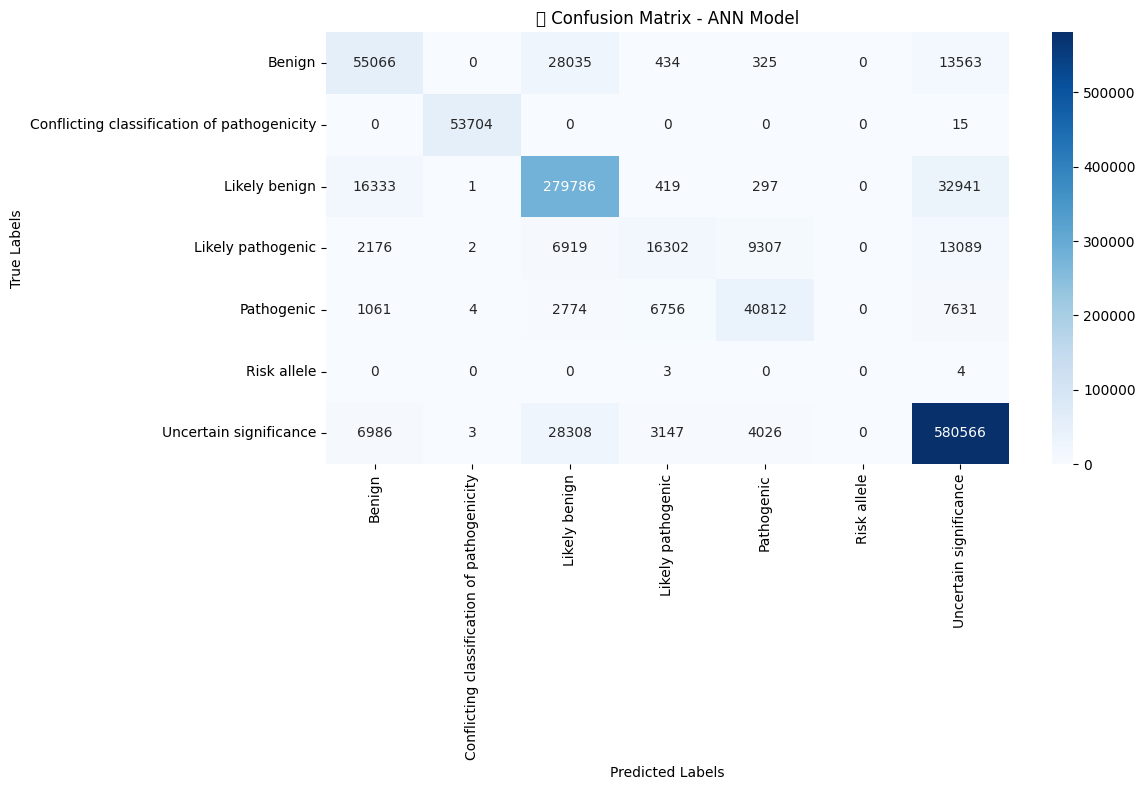

📋 Classification Report:
                                             precision    recall  f1-score   support

                                     Benign       0.67      0.57      0.62     97423
Conflicting classification of pathogenicity       1.00      1.00      1.00     53719
                              Likely benign       0.81      0.85      0.83    329777
                          Likely pathogenic       0.60      0.34      0.44     47795
                                 Pathogenic       0.75      0.69      0.72     59038
                                Risk allele       0.00      0.00      0.00         7
                     Uncertain significance       0.90      0.93      0.91    623036

                                   accuracy                           0.85   1210795
                                  macro avg       0.68      0.63      0.64   1210795
                               weighted avg       0.84      0.85      0.84   1210795



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Convert from one-hot to label indices if needed
y_test_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_true, y_pred)

# Optional: class names (use LabelEncoder if available, or hardcode)
try:
    class_names = le.classes_  # if you used LabelEncoder earlier
except NameError:
    # You can manually define class names if 'le' isn't available
    class_names = ['Benign', 'Likely benign', 'Pathogenic', 'Likely pathogenic', 'Uncertain significance']  # customize as needed

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('🧠 Confusion Matrix - ANN Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# Print classification report (optional)
print("📋 Classification Report:")
print(classification_report(y_test_true, y_pred, target_names=class_names))


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_test_true and y_pred are already defined
y_test_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_true, y_pred)

# Confusion Matrix Breakdown
TP = np.diag(conf_matrix)  # True Positives
FP = conf_matrix.sum(axis=0) - TP  # False Positives
TN = conf_matrix.sum(axis=1) - TP  # True Negatives
FN = conf_matrix.sum() - (TP + FP + TN)  # False Negatives

# Print individual metrics
print("\n🔍 Confusion Matrix Breakdown:")
for i, label in enumerate(class_names):
    print(f"\nClass '{label}':")
    print(f"  ✅ True Positive (TP): {TP[i]}")
    print(f"  ❌ False Positive (FP): {FP[i]}")
    print(f"  ✅ True Negative (TN): {TN[i]}")
    print(f"  ❌ False Negative (FN): {FN[i]}")



🔍 Confusion Matrix Breakdown:

Class 'Benign':
  ✅ True Positive (TP): 55066
  ❌ False Positive (FP): 26556
  ✅ True Negative (TN): 42357
  ❌ False Negative (FN): 1086816

Class 'Conflicting classification of pathogenicity':
  ✅ True Positive (TP): 53704
  ❌ False Positive (FP): 10
  ✅ True Negative (TN): 15
  ❌ False Negative (FN): 1157066

Class 'Likely benign':
  ✅ True Positive (TP): 279786
  ❌ False Positive (FP): 66036
  ✅ True Negative (TN): 49991
  ❌ False Negative (FN): 814982

Class 'Likely pathogenic':
  ✅ True Positive (TP): 16302
  ❌ False Positive (FP): 10759
  ✅ True Negative (TN): 31493
  ❌ False Negative (FN): 1152241

Class 'Pathogenic':
  ✅ True Positive (TP): 40812
  ❌ False Positive (FP): 13955
  ✅ True Negative (TN): 18226
  ❌ False Negative (FN): 1137802

Class 'Risk allele':
  ✅ True Positive (TP): 0
  ❌ False Positive (FP): 0
  ✅ True Negative (TN): 7
  ❌ False Negative (FN): 1210788

Class 'Uncertain significance':
  ✅ True Positive (TP): 580566
  ❌ False Pos

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_test_true and y_pred are already defined
y_test_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_true, y_pred)

# Confusion Matrix Breakdown
TP = np.diag(conf_matrix)  # True Positives (diagonal)
FP = conf_matrix.sum(axis=0) - TP  # False Positives (sum across columns - TP)
TN = conf_matrix.sum(axis=1) - TP  # True Negatives (sum across rows - TP)
FN = conf_matrix.sum() - (TP + FP + TN)  # False Negatives (total - TP - FP - TN)

# Calculate total TP, TN, FP, FN across all classes
total_TP = TP.sum()
total_FP = FP.sum()
total_TN = TN.sum()
total_FN = FN.sum()

# Print total values
print("\n🔍 Total Confusion Matrix Breakdown:")
print(f"  ✅ Total True Positives (TP): {total_TP}")
print(f"  ❌ Total False Positives (FP): {total_FP}")
print(f"  ✅ Total True Negatives (TN): {total_TN}")
print(f"  ❌ Total False Negatives (FN): {total_FN}")



🔍 Total Confusion Matrix Breakdown:
  ✅ Total True Positives (TP): 1026236
  ❌ Total False Positives (FP): 184559
  ✅ Total True Negatives (TN): 184559
  ❌ Total False Negatives (FN): 7080211


In [ ]:
df.shape

(6053974, 27)

In [ ]:
7019728/6053974

1.1595239754911402